In [3]:
import dask.bag as db

In [4]:
int_bag = db.from_sequence(list(range(1, 20)),
                           npartitions=4)

In [5]:
sample_dict = [{
    'first_name' : 'John',
    'second_name': 'Smith',
    'age': 29,
    'sex': 'Male',
    'hair': 'Black'
},{
    'first_name' : 'William',
    'second_name': 'Peterson',
    'age': 55,
    'sex': 'Male',
    'hair': 'Grey'
},{
    'first_name' : 'Rebecca',
    'second_name': 'Pearson',
    'age': 32,
    'sex': 'Female',
    'hair': 'Red'
},{
    'first_name' : 'Nancy',
    'second_name': 'Paul',
    'age': 45,
    'sex': 'Female',
    'hair': 'Grey'
}]

In [6]:
people_bag = db.from_sequence(sample_dict,
                             npartitions=4)

In [7]:
string_list = ['Hello', 'Bye', 'Hello', 'Yolo']
string_bag = db.from_sequence(string_list, npartitions=2)

## Map

In [8]:
add_1 = int_bag.map(lambda x: x + 1)

In [9]:
add_1

dask.bag<lambda, npartitions=4>

In [10]:
int_bag.compute()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [11]:
add_1.compute()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

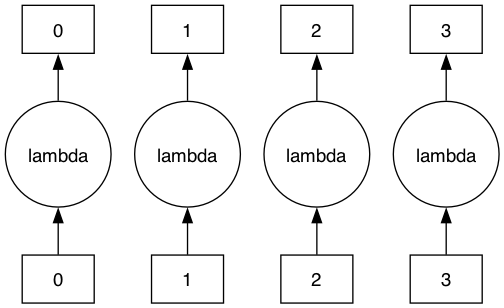

In [12]:
add_1.visualize()

## Accumulate

In [13]:
from operator import mul

In [14]:
prod = int_bag.accumulate(mul)

In [15]:
int_bag.compute()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [16]:
prod.compute()

[1,
 2,
 6,
 24,
 120,
 720,
 5040,
 40320,
 362880,
 3628800,
 39916800,
 479001600,
 6227020800,
 87178291200,
 1307674368000,
 20922789888000,
 355687428096000,
 6402373705728000,
 121645100408832000]

## Filter

In [17]:
def is_multiple_of_3(x):
    return x%3==0

In [18]:
multiples_three = int_bag.filter(is_multiple_of_3)

In [19]:
multiples_three.compute()

[3, 6, 9, 12, 15, 18]

In [20]:
less_than_30 = people_bag.filter(lambda x: x['age']<30)

In [21]:
less_than_30.compute()

[{'first_name': 'John',
  'second_name': 'Smith',
  'age': 29,
  'sex': 'Male',
  'hair': 'Black'}]

## Groupby

In [22]:
group_multiples = int_bag.groupby(is_multiple_of_3)

In [23]:
group_multiples.compute()

[(False, [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]),
 (True, [3, 6, 9, 12, 15, 18])]

In [24]:
group_by_sex = people_bag.groupby(lambda x: x['sex'])
group_by_sex.compute()

[('Male',
  [{'first_name': 'John',
    'second_name': 'Smith',
    'age': 29,
    'sex': 'Male',
    'hair': 'Black'},
   {'first_name': 'William',
    'second_name': 'Peterson',
    'age': 55,
    'sex': 'Male',
    'hair': 'Grey'}]),
 ('Female',
  [{'first_name': 'Rebecca',
    'second_name': 'Pearson',
    'age': 32,
    'sex': 'Female',
    'hair': 'Red'},
   {'first_name': 'Nancy',
    'second_name': 'Paul',
    'age': 45,
    'sex': 'Female',
    'hair': 'Grey'}])]

## Take

In [25]:
int_bag.take(3)

(1, 2, 3)

In [26]:
int_bag.npartitions

4

In [27]:
int_bag.take(10, npartitions=1)

/Users/alexiuk/projects/baseline0/-Scalable-Data-Analysis-in-Python-with-Dask-Kashif/venv/lib/python3.12/site-packages/dask/bag/core.py:2511: UserWarning: Insufficient elements for `take`. 10 elements requested, only 5 elements available. Try passing larger `npartitions` to `take`.
  warnings.warn(


(1, 2, 3, 4, 5)

## Pluck

In [28]:
second_names = people_bag.pluck('second_name')

In [29]:
second_names.compute()

['Smith', 'Peterson', 'Pearson', 'Paul']

## Fold

In [30]:
def add_strs(x, y):
    return x + y

def combined_len(x, y):
    return len(x + y)

#  bin_op1 = binop(x1, x2)
#  bin_op2 = binop(x3, x4)
#  combine_result = combine_op(bin_op1, bin_op2)
#
len_sum = string_bag.fold(binop=add_strs,
                         combine=combined_len)

print(string_bag.compute())
print(len_sum.compute())

['Hello', 'Bye', 'Hello', 'Yolo']
17


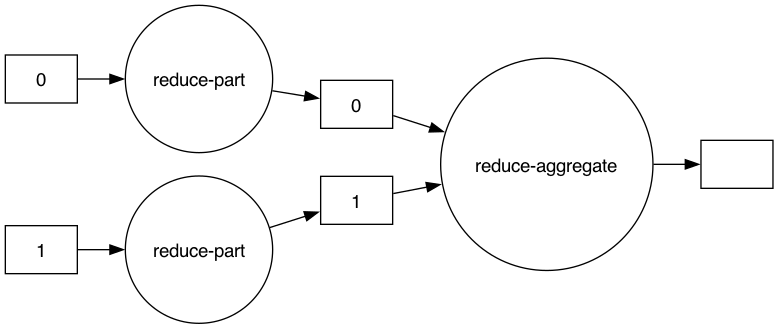

In [31]:
len_sum.visualize(rankdir='LR')

## Distinct

In [32]:
string_bag.compute()

['Hello', 'Bye', 'Hello', 'Yolo']

In [33]:
list(string_bag.distinct())

['Hello', 'Bye', 'Yolo']

## Frequencies

In [34]:
dict(string_bag.frequencies())

{'Hello': 2, 'Bye': 1, 'Yolo': 1}

## Mean

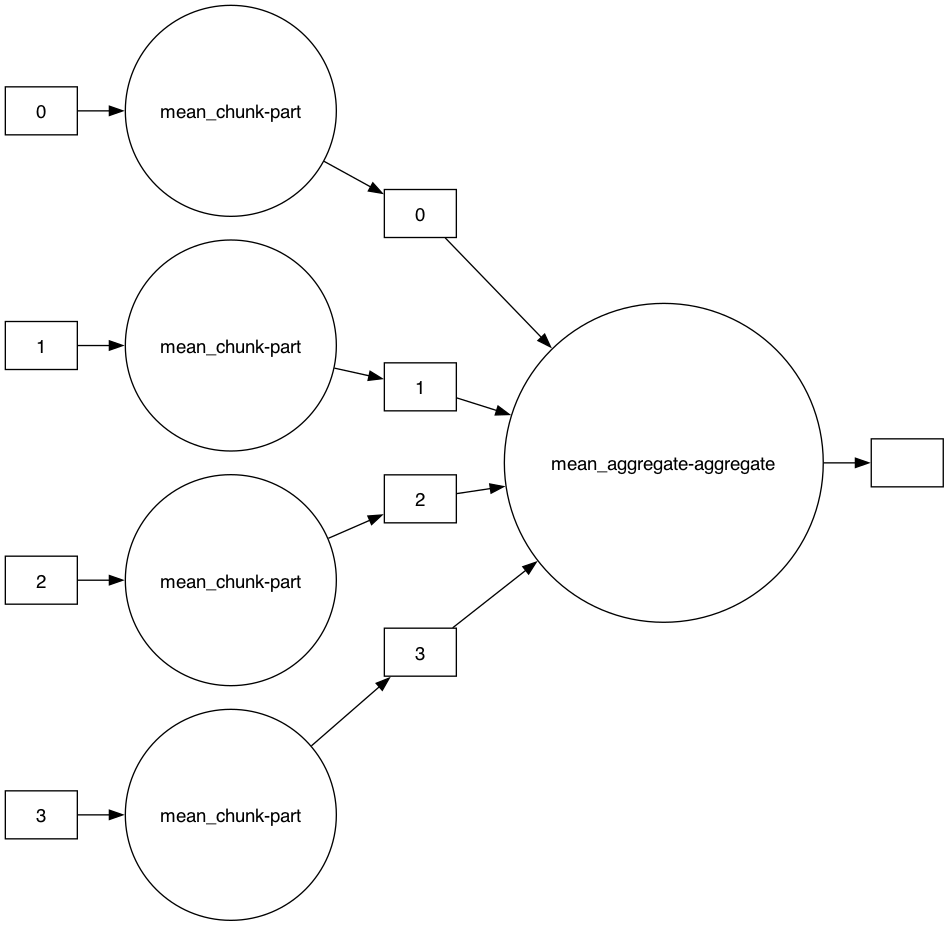

In [35]:
int_bag.mean().visualize(rankdir='LR')

In [36]:
int_bag.mean().compute()

10.0

## Sum

In [37]:
int_bag.sum().compute()

190

## Standard Deviation

In [38]:
int_bag.std().compute()

5.477225575051661

## TopK

In [39]:
int_bag.topk(4).compute()

[19, 18, 17, 16]

In [40]:
string_bag.topk(1, key=len).compute()

['Hello']

In [41]:
string_bag.compute()

['Hello', 'Bye', 'Hello', 'Yolo']